## Pesquisa Nacional de Saúde - PNS 2019

Nesta aula prática, vamos trabalhar com dados da PNS 2019, utilizando códigos em R para aprender os seguintes tópicos:


1.   Leitura de microdados utilizando a biblioteca PNSIBGE
2.   Colocar rótulos em todas as variáveis do banco de dados a partir da função pns_labeller
3.   Elaborar gráficos.


📚 Inicialmente vamos conectar a sessão ao seu Google drive. Então, antes de começar a trabalhar crie uma pasta no seu drive (PNS) e que irá salvar todos os arquivos que você baixar.


In [ ]:
#Conectando a sessão ao seu google drive 
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#Nesta prática vamos trabalhar com códigos em R. Para fazer isso vamos instalar a extensão rpy2 IPython ao notebook. 
%load_ext rpy2.ipython

📌 A partir de agora, sempre que você colocar o código %%R no início de cada célula, você conseguirá executar comandos do R no notebook.

📖 Utilizaremos ao longo desta aula a biblioteca PNSIBGE criada especificamente para leitura dos microdados da PNS. Maiores informações sobre ela você encontra [aqui](https://cran.r-project.org/web/packages/PNSIBGE/PNSIBGE.pdf).

In [ ]:
#Instalando pacote da biblioteca do IBGE
%%R
install.packages("PNSIBGE")


In [ ]:
#Carregando
%%R
library(PNSIBGE)

In [ ]:
#Agora vamos baixar os microdados da PNS 2019
#Observe que estamos baixando os microdados em uma pasta do drive (no exemplo, uma pasta chamada PNS)
%%R
get_pns(2019, selected = FALSE, anthropometry = FALSE, savedir="/content/drive/MyDrive/PNS")

R[write to console]: trying URL 'https://ftp.ibge.gov.br/PNS/2019/Microdados/Documentacao/Dicionario_e_input_20211109.zip'

R[write to console]: Content type 'application/zip'
R[write to console]:  length 172317 bytes (168 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to co

Stratified 1 - level Cluster Sampling design (with replacement)
With (8028) clusters.
survey::postStratify(design = data_prior, strata = ~V00283, population = popc.types)


Ao final desse procedimento em sua pasta deverá conter 8 arquivos:
1.   Deflatores.zip
2.   Dicionario_e_input.zip
3.   PNS_2019.txt
4.   PNS_2019_20210826.zip
5.   deflator_PNS_2019.xls
6.   dicionario_PNS_microdados_2019.xls
7.   input_PNS_2019.sas
8.   input_PNS_2019.txt



In [ ]:
#Leitura dos microdados da PNS 2019: 
%%R
PNS2019 <- read_pns("/content/drive/MyDrive/PNS/PNS_2019.txt", "/content/drive/MyDrive/PNS/input_PNS_2019.txt")

Dessa vez vamos utilizar uma função específica da biblioteca PNSIBGE para colocar rótulos em todas as variáveis categóricas (pns_labeller):

In [ ]:
#Aplicando a função pns_labeller e criando um novo objeto (pns19)
%%R
pns19 <- pns_labeller(PNS2019, "/content/drive/MyDrive/PNS/dicionario_PNS_microdados_2019.xls")

In [ ]:
#Visualizando o banco de dados
%%R
print(pns19)

Para exercitar, vamos trabalhar com informações sobre Atendimento Pré-natal (Módulo S) da parte de Ciclo de Vida. Variáveis que vamos trabalhar:

1.   V0001: Unidade da Federação 
2.   UPA_PNS: Código da Unidade Primária de Amostragem (UPA)
3.   V0024: estratos do plano amostral da pesquisa
4.   S073: As consultas do pré-natal foram feitas através do Sistema Único de Saúde (SUS)?
5.   S080: Durante o pré-natal de (nome) foi realizado teste∕ exame para sífilis? 
6.   S081: Recebeu ou foi informada sobre o resultado do teste∕ exame para sífilis antes do parto?
7.   S082: Qual foi o resultado do teste / exame para sífilis? 
8.   S086: Qual foi o resultado do teste∕ exame para sífilis do seu parceiro? 
9.   V00281: Peso do domicílio e dos moradores com correção de não entrevista com calibração pela projeção de população - Usado no cálculo de indicadores de domicílio e moradores



In [ ]:
#Para trabalhar com as variáveis relacionadas ao  desenho amostral da PNS 2019 precisaremos transformar de character(string)em numéricas
%%R
pns19$UPA_PNS=as.numeric(pns19$UPA_PNS)
pns19$V0024=as.numeric(pns19$V0024)


In [ ]:
#Conferindo
%%R
str(pns19)


## Incorporando a estrutura do plano amostral da PNS nas análises estatísticas  

Assim como  a PNAD C e a POF, a PNS apresenta um desenho complexo de amostragem, então vamos incorporar a estrutura do plano amostral desta pesquisa nas análises  análises pontuais que faremos.


In [ ]:
#Vamos instalar o pacote survey
%%R
install.packages("survey")

In [ ]:
#E carrega-lo
%%R
library(survey)

In [ ]:
#Recompondo o plano amostral para Brasil 
%%R
sample.pns <- svydesign(ids = ~UPA_PNS, strata = ~V0024, weights = ~V00281, data = pns19 , na.rm=TRUE, nest = TRUE)

# para evitar erro "has only one PSU at stage 1"
options(survey.lonely.psu = "adjust")

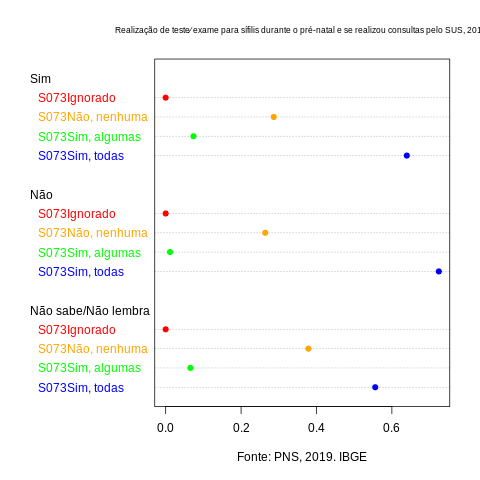

In [ ]:
#Agora você pode proceder às análises
#a)  Realização de teste∕ exame para sífilis durante o pré-natal e se realizou consultas pelo SUS
%%R
a=svyby( ~S073, ~S080, sample.pns, svymean, na.rm=TRUE)
dotchart(a, main = "Realização de teste∕ exame para sífilis durante o pré-natal e se realizou consultas pelo SUS, 2019.", font.main = 12, col.main = "black", cex.main = 0.7,
col = c("blue", "green", "orange", "red"),
xlab = "Fonte: PNS, 2019. IBGE")

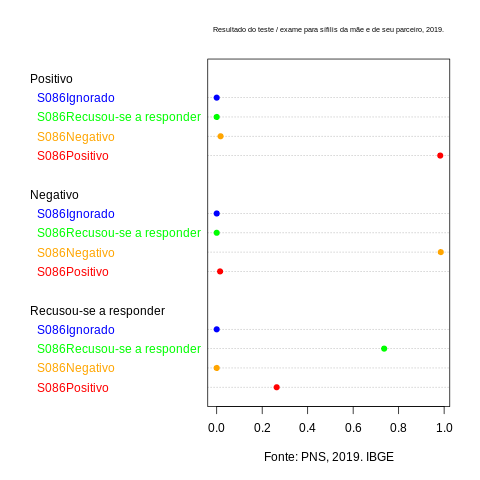

In [ ]:
#b)   Resultado do teste / exame para sífilis da mãe e do parceiro 
%%R
b=svyby( ~S086, ~S082, sample.pns, svymean, na.rm=TRUE)
dotchart(b, main = "Resultado do teste / exame para sífilis da mãe e de seu parceiro, 2019.", font.main = 13, col.main = "black", cex.main = 0.6,
        col = c("red", "orange",  "green", "blue"), 
        xlab = "Fonte: PNS, 2019. IBGE") 

In [ ]:
#Salvando a base de dados em seu drive
%%R
save(pns19,file="/content/drive/MyDrive/PNS/pns19.Rdata")

In [ ]:
#Abrindo a base
%%R
load("/content/drive/MyDrive/PNS/pns19.Rdata")